In [1]:
import numpy as np
import cv2
import math
import os
import shutil
import random

#display results
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.style.use('grayscale')
              
%matplotlib inline

In [2]:
def load_image(filename):
    """
    Loads image from file 
    
    Arguments:
        filename: str
        
    Returns:
        result: np.ndarray
    """
    assert os.path.exists(filename)
    return cv2.imread(filename)

def to_rgb(image):
    """
    Converts BGR to RGB colorspace
    """
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def to_gray(image):
    """
    Converts BGR to GRAY colorspace
    """
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [3]:
FILENAME = "images/elephant.png"

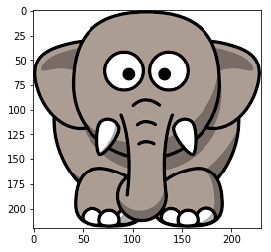

In [4]:
image = load_image(FILENAME)

plt.imshow(image)
plt.show()

In [5]:
print(image.shape)  # h x w x c (HWC)

(220, 230, 3)


In [6]:
print(np.expand_dims(image, 0).shape)  # NHWC

(1, 220, 230, 3)


In [7]:
print(image[:3, :3])

[[[255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]]]


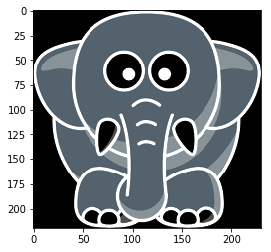

In [8]:
def inverse(image, max_intensity=255):
    return max_intensity - image


plt.imshow(inverse(image))
plt.show()

## Convolution (Filtering)
https://graphics.stanford.edu/courses/cs178-10/applets/convolution.html

### Identity

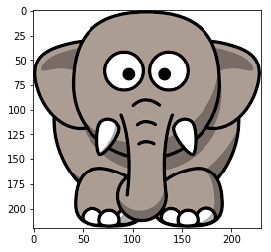

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [10]:
def get_identity_filter2d(kernel_size=3, intensity=1):
    kernel = np.zeros((kernel_size, kernel_size),np.float32)
    kernel[kernel_size // 2, kernel_size // 2] = intensity
    return kernel

kernel = get_identity_filter2d(5)

plt.imshow(cv2.filter2D(image, -1, kernel))
plt.show()

print(kernel)

### Average/Mean

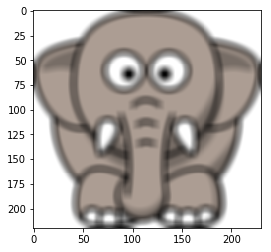

[[0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]]


In [24]:
def get_average_filter2d(kernel_size):
    return np.ones((kernel_size, kernel_size),np.float32) / kernel_size**2

kernel = get_average_filter2d(9)
plt.imshow(cv2.filter2D(image, -1, kernel))
plt.show()

print(kernel)

### Median Filter

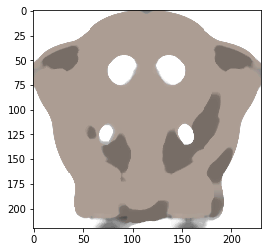

In [15]:
# middle point of ordered list (sort -> (n + 1) / 2)
# for noise reduction

plt.imshow(cv2.medianBlur(image, 19))
plt.show()

### Shift Left

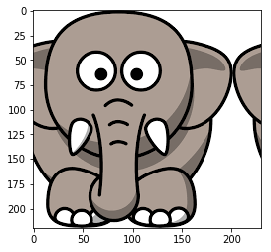

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [18]:
def get_shift_left_filter2d(kernel_size):
    kernel = np.zeros((kernel_size, kernel_size),np.float32)
    kernel[kernel_size // 2, kernel_size - 1] = 1
    return kernel

kernel = get_shift_left_filter2d(57)
plt.imshow(cv2.filter2D(image, -1, kernel))
plt.show()

print(kernel)

### Shift Right

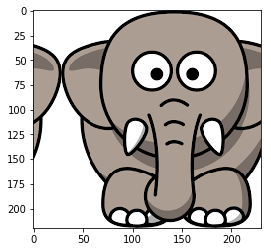

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [20]:
def get_shift_right_filter2d(kernel_size):
    kernel = np.zeros((kernel_size, kernel_size),np.float32)
    kernel[kernel_size // 2, 0] = 1
    return kernel

kernel = get_shift_right_filter2d(57)

plt.imshow(cv2.filter2D(image, -1, kernel))
plt.show()

print(kernel)

### Sharpening

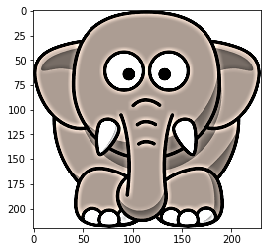

[[-0.01234568 -0.01234568 -0.01234568 -0.01234568 -0.01234568 -0.01234568
  -0.01234568 -0.01234568 -0.01234568]
 [-0.01234568 -0.01234568 -0.01234568 -0.01234568 -0.01234568 -0.01234568
  -0.01234568 -0.01234568 -0.01234568]
 [-0.01234568 -0.01234568 -0.01234568 -0.01234568 -0.01234568 -0.01234568
  -0.01234568 -0.01234568 -0.01234568]
 [-0.01234568 -0.01234568 -0.01234568 -0.01234568 -0.01234568 -0.01234568
  -0.01234568 -0.01234568 -0.01234568]
 [-0.01234568 -0.01234568 -0.01234568 -0.01234568  1.9876543  -0.01234568
  -0.01234568 -0.01234568 -0.01234568]
 [-0.01234568 -0.01234568 -0.01234568 -0.01234568 -0.01234568 -0.01234568
  -0.01234568 -0.01234568 -0.01234568]
 [-0.01234568 -0.01234568 -0.01234568 -0.01234568 -0.01234568 -0.01234568
  -0.01234568 -0.01234568 -0.01234568]
 [-0.01234568 -0.01234568 -0.01234568 -0.01234568 -0.01234568 -0.01234568
  -0.01234568 -0.01234568 -0.01234568]
 [-0.01234568 -0.01234568 -0.01234568 -0.01234568 -0.01234568 -0.01234568
  -0.01234568 -0.01234

In [25]:
def get_sharpening_filter(kernel_size):
    # Stretched Laplacian + Initial Image
    # Average - Identity = Sharp Boundaries
    identity_kernel = get_identity_filter2d(kernel_size, intensity=2)
    average_kernel = get_average_filter2d(kernel_size)
    
    return identity_kernel - average_kernel

kernel = get_sharpening_filter(9)

plt.imshow(cv2.filter2D(image, -1, kernel))
plt.show()

print(kernel)

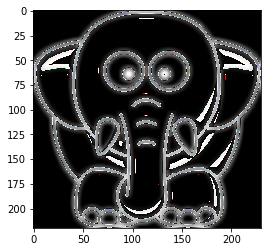

In [23]:
plt.imshow(image - cv2.filter2D(image, -1, get_average_filter2d(9)))
plt.show()

### Gaussian

Text(0.5,0,'Sample')

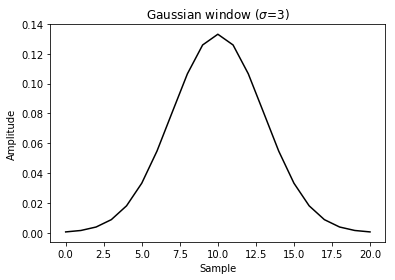

In [26]:
sigma = 3
kernel_size = 21
window = cv2.getGaussianKernel(kernel_size, sigma)

plt.plot(window)
plt.title(r"Gaussian window ($\sigma$={})".format(sigma))
plt.ylabel("Amplitude")
plt.xlabel("Sample")

In [27]:
def get_gaussian_filter2d(kernel_size, sigma=1):
    gaussian_filter = cv2.getGaussianKernel(kernel_size, sigma).flatten()
    
    gaussian_filter = gaussian_filter.reshape((len(gaussian_filter), 1)) * gaussian_filter
    
    gaussian_filter /= np.sum(gaussian_filter)
    return gaussian_filter

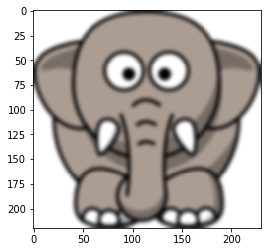

[[0.00076345 0.00183141 0.00342153 0.0049783  0.00564116 0.0049783
  0.00342153 0.00183141 0.00076345]
 [0.00183141 0.00439334 0.00820783 0.01194233 0.01353243 0.01194233
  0.00820783 0.00439334 0.00183141]
 [0.00342153 0.00820783 0.01533425 0.0223112  0.0252819  0.0223112
  0.01533425 0.00820783 0.00342153]
 [0.0049783  0.01194233 0.0223112  0.03246261 0.03678495 0.03246261
  0.0223112  0.01194233 0.0049783 ]
 [0.00564116 0.01353243 0.0252819  0.03678495 0.04168281 0.03678495
  0.0252819  0.01353243 0.00564116]
 [0.0049783  0.01194233 0.0223112  0.03246261 0.03678495 0.03246261
  0.0223112  0.01194233 0.0049783 ]
 [0.00342153 0.00820783 0.01533425 0.0223112  0.0252819  0.0223112
  0.01533425 0.00820783 0.00342153]
 [0.00183141 0.00439334 0.00820783 0.01194233 0.01353243 0.01194233
  0.00820783 0.00439334 0.00183141]
 [0.00076345 0.00183141 0.00342153 0.0049783  0.00564116 0.0049783
  0.00342153 0.00183141 0.00076345]]


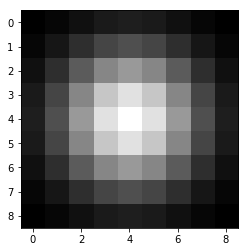

In [28]:
kernel = get_gaussian_filter2d(9, 2)

plt.imshow(cv2.filter2D(image, -1, kernel))
plt.show()

print(kernel)

plt.imshow(kernel)
plt.show()

### Sobel (Vertical Edge)

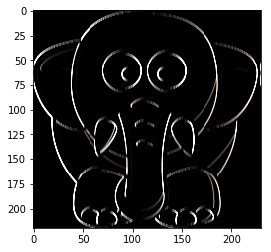

[[ 0.  1. -1.]
 [ 0.  1. -1.]
 [ 0.  1. -1.]]


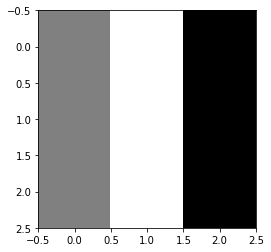

In [29]:
def get_dx_filter2d():
    return np.array([[0, 1, -1]] * 3, dtype=np.float32)

def get_dx_sobel_filter2d():
    return np.array([[1, 0, -1]] * 3, dtype=np.float32)

kernel = get_dx_filter2d()
plt.imshow(cv2.filter2D(image, -1, kernel))
plt.show()

print(kernel)

plt.imshow(kernel)
plt.show()

### Sobel (Horizontal Edge)

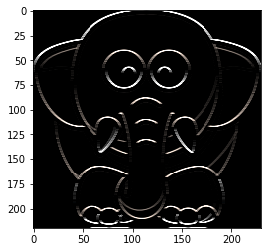

[[ 0.  0.  0.]
 [ 1.  1.  1.]
 [-1. -1. -1.]]


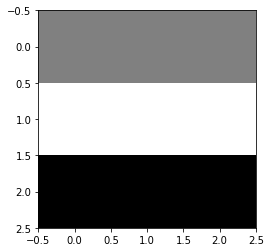

In [30]:
def get_dy_filter2d():
    return np.array([[0, 1, -1]] * 3, dtype=np.float32).T

def get_dy_sobel_filter2d():
    return np.array([[1, 0, -1]] * 3, dtype=np.float32).T 

kernel = get_dy_filter2d()
plt.imshow(cv2.filter2D(image, -1, kernel))
plt.show()

print(kernel)

plt.imshow(kernel)
plt.show()

### Laplacian
Second derivatives

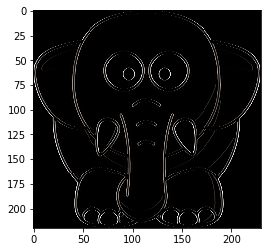

In [31]:
def get_dx2_filter2d():
    # Second derivative  X
    # f(x + 1) + f(x - 1) - 2f(x)

    return np.array([
        [0, 0, 0],
        [1, -2, 1],
        [0, 0, 0]
    ])
    
plt.imshow(cv2.filter2D(image, -1, get_dx2_filter2d()))
plt.show()

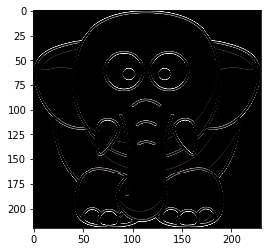

In [32]:
def get_dy2_filter2d():
    # Second derivative  Y
    # f(y + 1) + f(y - 1) - 2f(y)

    return np.array([
        [0, 1, 0],
        [0, -2, 0],
        [0, 1, 0]
    ])

plt.imshow(cv2.filter2D(image, -1, get_dy2_filter2d()))
plt.show()

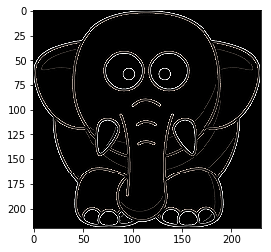

[[ 0  1  0]
 [ 1 -4  1]
 [ 0  1  0]]


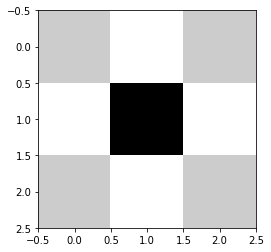

In [33]:
def get_laplacian_filter2d():
    return get_dx2_filter2d() + get_dy2_filter2d()

kernel = get_laplacian_filter2d()
plt.imshow(cv2.filter2D(image, -1, get_laplacian_filter2d()))
plt.show()

print(kernel)

plt.imshow(kernel)
plt.show()

### Edge

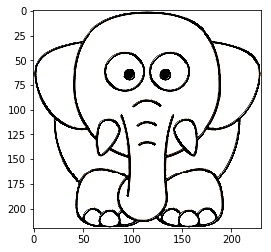

[[ 1.  2. -1.]
 [ 2.  4. -2.]
 [-1. -2.  1.]]


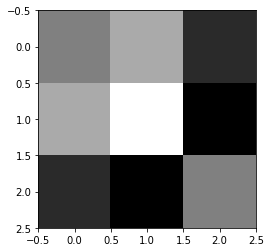

In [34]:
def get_blurred_laplacian():
    kernel = np.array([1, 2, -1], dtype=np.float32)
    return kernel.reshape((len(kernel), 1)) * kernel

kernel = get_blurred_laplacian()
plt.imshow(cv2.filter2D(image, -1, kernel))
plt.show()

print(kernel)

plt.imshow(kernel)
plt.show()

### Gradient (Orientation)

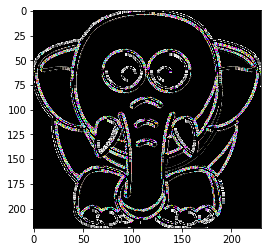

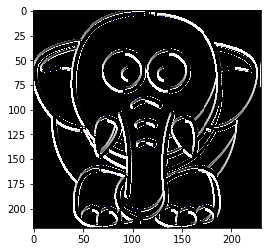

In [35]:
# DX
dx = cv2.filter2D(image, -1, get_dx_filter2d())
dy = cv2.filter2D(image, -1, get_dy_filter2d())

# Gradient
gradient = np.sqrt(np.square(dx) + np.square(dy))
plt.imshow(((gradient/np.max(gradient)) * 255).astype('uint8'))
plt.show()

# Angle
dy = dy.astype('float32') + 0.0001
angle = np.arctan(dx / dy)
plt.imshow(((angle/np.max(angle)) * 255).astype('uint8'))
plt.show()

### Additional filters

#### Motion Blur

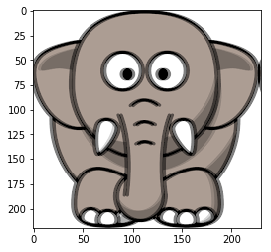

[[0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.5 0.  0.  0.5 0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0. ]]


In [45]:
def get_motion_blur_filter2d(size=3):
    # generating the kernel
    kernel = np.zeros((size, size))
    # kernel_motion_blur[int((size-1)/2), :] = np.ones(size)
    kernel[int((size-1)/2), int((size-1)/2)] = 1
    kernel[int((size-1)/2), int((size-1)/2) + 3] = 1

    return kernel / np.sum(kernel)

# applying the kernel to the input image
kernel = get_motion_blur_filter2d(9)

plt.imshow(cv2.filter2D(image, -1, kernel))
plt.show()

print(kernel)

### Integral Image

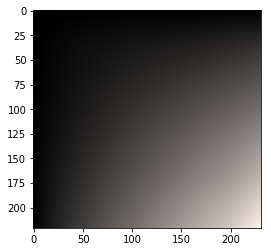

In [46]:
integral = cv2.integral(image)

plt.imshow(((integral/np.max(integral)) * 255).astype('uint8'))
plt.show()

## Features

### HOG
 https://gurus.pyimagesearch.com/lesson-sample-histogram-of-oriented-gradients-and-car-logo-recognition/

/home/taras/python-environments/cv/lib/python3.6/site-packages/skimage/feature/_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


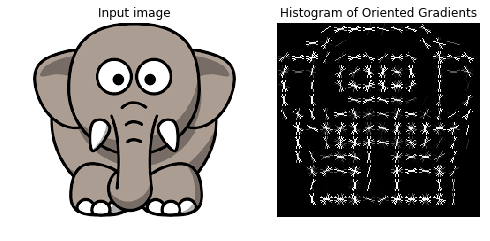

In [47]:
from skimage.feature import hog
from skimage import exposure


fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, multichannel=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

### HAAR
https://docs.opencv.org/3.4/d7/d8b/tutorial_py_face_detection.html

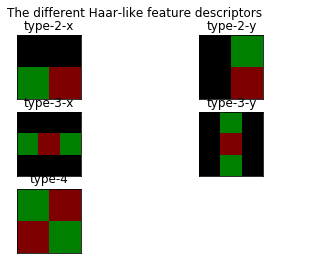

In [48]:
from skimage.feature import haar_like_feature_coord
from skimage.feature import draw_haar_like_feature

images = [np.zeros((2, 2)), np.zeros((2, 2)),
          np.zeros((3, 3)), np.zeros((3, 3)),
          np.zeros((2, 2))]

feature_types = ['type-2-x', 'type-2-y',
                 'type-3-x', 'type-3-y',
                 'type-4']

fig, axs = plt.subplots(3, 2)
for ax, img, feat_t in zip(np.ravel(axs), images, feature_types):
    coord, _ = haar_like_feature_coord(img.shape[0], img.shape[1], feat_t)
    haar_feature = draw_haar_like_feature(img, 0, 0,
                                          img.shape[0],
                                          img.shape[1],
                                          coord,
                                          max_n_features=1,
                                          random_state=0)
    ax.imshow(haar_feature)
    ax.set_title(feat_t)
    ax.set_xticks([])
    ax.set_yticks([])

fig.suptitle('The different Haar-like feature descriptors')
plt.axis('off')
plt.show()